In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
sales_data = pd.read_csv("sales_data_sample.csv", encoding = "latin-1")

## Análise Exploratória e Limpeza dos Dados

In [4]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,"2,871.00",2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,"2,765.90",5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,"3,884.34",7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,"3,746.70",8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,"5,205.27",10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
sales_data.shape

(2823, 25)

In [6]:
# Visualizar todas as colunas.

pd.options.display.max_columns=25

In [7]:
display(sales_data)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,"2,871.00",2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,"2,765.90",5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,"3,884.34",7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,"3,746.70",8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,"5,205.27",10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,"2,244.40",12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,"3,978.51",1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,"5,417.57",3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,"2,116.16",3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
sales_data.duplicated().sum()

0

In [10]:
sales_data.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [11]:
sales_data["ORDERDATE"] = pd.to_datetime(sales_data["ORDERDATE"])

In [12]:
sales_data.columns.str.lower()

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [13]:
sales_data.columns = ['order_number', 'quantity_ordered', 'price_each', 'order_line_number',
       'sales', 'order_date', 'status', 'quarter', 'month', 'year',
       'product_line', 'msrp', 'product_code', 'customer_name', 'phone',
       'address_line1', 'address_line2', 'city', 'state', 'postal_code',
       'country', 'territory', 'contact_lastname', 'contact_firstname',
       'deal_size']

Remover as colunas que não contém informações relevantes para esta análise.

In [14]:
sales_data = sales_data[['order_number', 'quantity_ordered', 'price_each', 'sales', 'order_date', 'status', 'quarter', 'month', 'year',
       'product_line', 'msrp', 'product_code', 'customer_name', 'city', 'country', 'deal_size']]

In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_number      2823 non-null   int64         
 1   quantity_ordered  2823 non-null   int64         
 2   price_each        2823 non-null   float64       
 3   sales             2823 non-null   float64       
 4   order_date        2823 non-null   datetime64[ns]
 5   status            2823 non-null   object        
 6   quarter           2823 non-null   int64         
 7   month             2823 non-null   int64         
 8   year              2823 non-null   int64         
 9   product_line      2823 non-null   object        
 10  msrp              2823 non-null   int64         
 11  product_code      2823 non-null   object        
 12  customer_name     2823 non-null   object        
 13  city              2823 non-null   object        
 14  country           2823 n

In [18]:
inicio = sales_data["order_date"].min().strftime("%d/%m/%Y")
fim = sales_data["order_date"].max().strftime("%d/%m/%Y")
print(f"Período analizado: de {inicio} até {fim}")

Período analizado: de 06/01/2003 até 31/05/2005


## Análise dos Dados

In [19]:
sales_data[['quantity_ordered', 'price_each', 'sales', 'msrp']].describe()

,quantity_ordered,price_each,sales,msrp
count,"2,823.00","2,823.00","2,823.00","2,823.00"
mean,35.09,83.66,"3,553.89",100.72
std,9.74,20.17,"1,841.87",40.19
min,6.00,26.88,482.13,33.00
25%,27.00,68.86,"2,203.43",68.00
50%,35.00,95.70,"3,184.80",99.00
75%,43.00,100.00,"4,508.00",124.00
max,97.00,100.00,"14,082.80",214.00


In [20]:
top_country = sales_data.groupby(["country"]).sum().sort_values("sales", ascending = False)
top_country = top_country[['sales']].reset_index().rename(columns={'sales':'total_sales'})[:10]
display(top_country)

,country,total_sales
0,USA,"3,627,982.83"
1,Spain,"1,215,686.92"
2,France,"1,110,916.52"
3,Australia,"630,623.10"
4,UK,"478,880.46"
5,Italy,"374,674.31"
6,Finland,"329,581.91"
7,Norway,"307,463.70"
8,Singapore,"288,488.41"
9,Denmark,"245,637.15"


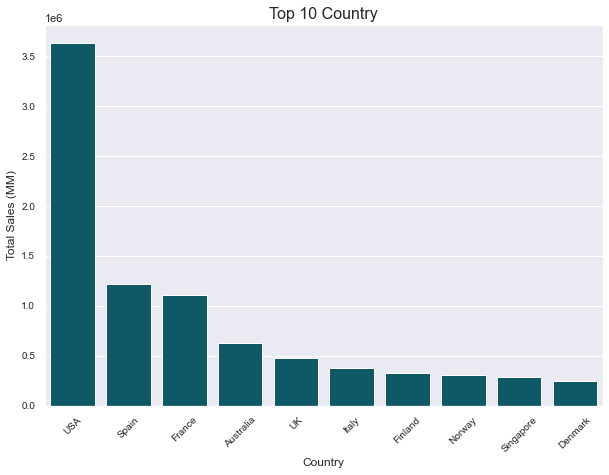

In [21]:
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Top 10 Country', fontsize=16)
plt.tick_params(labelsize=10)
plt.xticks(rotation=45)
grafico = sns.barplot(data=top_country, x='country', y='total_sales', orient='v', color='#006373')
grafico.set_xlabel("Country", fontsize=12)
grafico.set_ylabel("Total Sales (MM)", fontsize=12);

In [22]:
top_city = sales_data.groupby(["city"])[['sales', 'country']].agg({'country':'min', 'sales':'sum'}).sort_values(by='sales', ascending = False).reset_index().rename(columns={'sales':'total_sales'})[:10]
display(top_city)

,city,country,total_sales
0,Madrid,Spain,"1,082,551.44"
1,San Rafael,USA,"654,858.06"
2,NYC,USA,"560,787.77"
3,Singapore,Singapore,"288,488.41"
4,Paris,France,"268,944.68"
5,San Francisco,USA,"224,358.68"
6,New Bedford,USA,"207,874.86"
7,Nantes,France,"204,304.86"
8,Melbourne,Australia,"200,995.41"
9,Brickhaven,USA,"165,255.20"


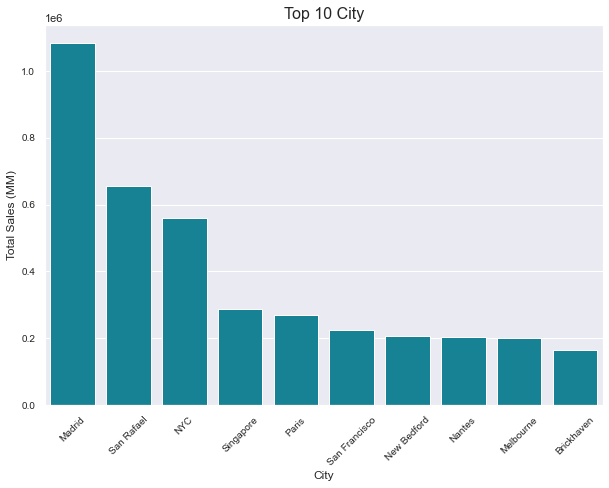

In [23]:
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Top 10 City', fontsize=16)
plt.tick_params(labelsize=10)
plt.xticks(rotation=45)
grafico = sns.barplot(data=top_city, x='city', y='total_sales', orient='v', color='#0291a8')
grafico.set_xlabel("City", fontsize=12)
grafico.set_ylabel("Total Sales (MM)", fontsize=12);

In [24]:
### TABLEAU: ANALISAR AS CIDADES COM MAIORES VENDAS NOS 3 PRINCIPAIS PAÍSES. ###

In [25]:
product_line_rank = sales_data.groupby(["product_line"]).count().sort_values("sales", ascending = False)
product_line_rank = product_line_rank[['sales']].reset_index().rename(columns={'sales':'total_sales'})
display(product_line_rank)

,product_line,total_sales
0,Classic Cars,967
1,Vintage Cars,607
2,Motorcycles,331
3,Planes,306
4,Trucks and Buses,301
5,Ships,234
6,Trains,77


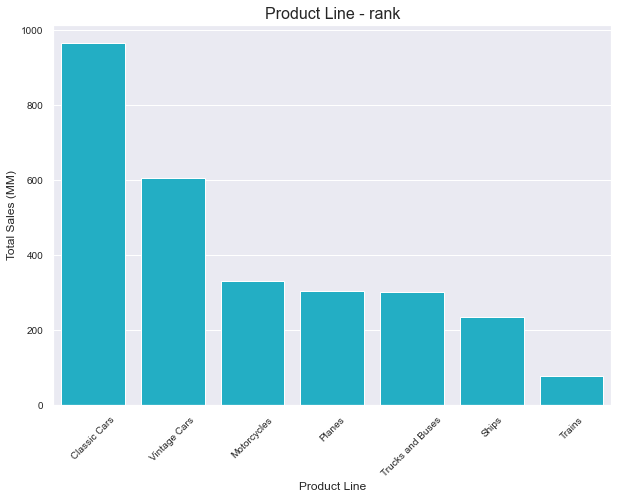

In [26]:
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Product Line - rank', fontsize=16)
plt.tick_params(labelsize=10)
plt.xticks(rotation=45)
grafico = sns.barplot(data=product_line_rank, x='product_line', y='total_sales', orient='v', color='#08c1df')
grafico.set_xlabel("Product Line", fontsize=12)
grafico.set_ylabel("Total Sales (MM)", fontsize=12);

In [ ]:
### INCLUIR O PERCENTUAL QUE CADA CLIENTE REPRESENTA DO TOTAL DE VENDAS ###

In [27]:
top_customer = sales_data.groupby(["customer_name"])[['sales', 'city','country']].agg({'city':'min','country':'min', 'sales':'sum'}).sort_values(by='sales', ascending = False).reset_index().rename(columns={'sales':'total_sales'})[:10]
top_customer

,customer_name,city,country,total_sales
0,Euro Shopping Channel,Madrid,Spain,"912,294.11"
1,Mini Gifts Distributors Ltd.,San Rafael,USA,"654,858.06"
2,"Australian Collectors, Co.",Melbourne,Australia,"200,995.41"
3,Muscle Machine Inc,NYC,USA,"197,736.94"
4,La Rochelle Gifts,Nantes,France,"180,124.90"
5,"Dragon Souveniers, Ltd.",Singapore,Singapore,"172,989.68"
6,Land of Toys Inc.,NYC,USA,"164,069.44"
7,The Sharp Gifts Warehouse,San Jose,USA,"160,010.27"
8,"AV Stores, Co.",Manchester,UK,"157,807.81"
9,"Anna's Decorations, Ltd",North Sydney,Australia,"153,996.13"


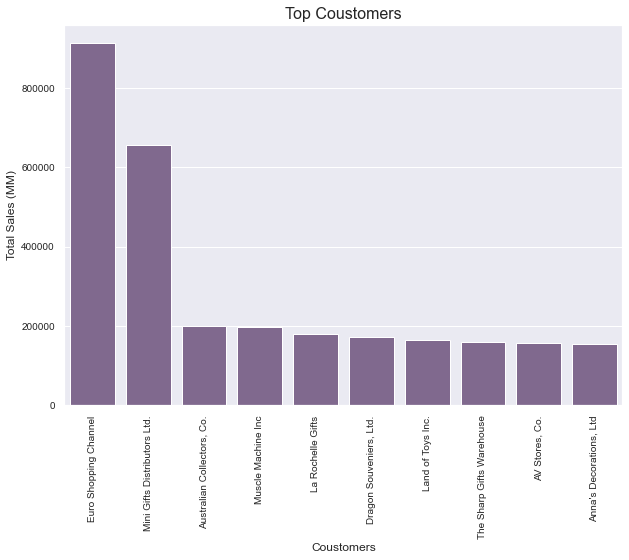

In [28]:
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Top Coustomers', fontsize=16)
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
grafico = sns.barplot(data=top_customer, x='customer_name', y='total_sales', orient='v', color='#826394')
grafico.set_xlabel("Coustomers", fontsize=12)
grafico.set_ylabel("Total Sales (MM)", fontsize=12);

In [29]:
deal_size_distribution = sales_data.groupby(["deal_size"]).sum().sort_values("sales", ascending = False)
deal_size_distribution = deal_size_distribution[['sales']].reset_index().rename(columns={'sales':'total_sales'})
display(deal_size_distribution)

,deal_size,total_sales
0,Medium,"6,087,432.24"
1,Small,"2,643,077.35"
2,Large,"1,302,119.26"


In [30]:
### TABLEAU: FAZER GRÁFICO DE BOLAS PARA deal_size ###

In [31]:
sales_data["sale_price_each"]=sales_data["sales"]/sales_data["quantity_ordered"]
sales_data["sales_price/msrp"]=sales_data["sale_price_each"]/sales_data["msrp"]

In [32]:
sales_data.columns

Index(['order_number', 'quantity_ordered', 'price_each', 'sales', 'order_date',
       'status', 'quarter', 'month', 'year', 'product_line', 'msrp',
       'product_code', 'customer_name', 'city', 'country', 'deal_size',
       'sale_price_each', 'sales_price/msrp'],
      dtype='object')

In [33]:
sales_data = sales_data[['order_number', 'quantity_ordered', 'sales', 'sale_price_each', 'price_each', 'msrp', 'sales_price/msrp',
                         'order_date', 'status', 'quarter', 'month', 'year', 'product_code', 'product_line', 'city', 'country',
                         'customer_name', 'deal_size']]

In [34]:
display(sales_data)

,order_number,quantity_ordered,sales,sale_price_each,price_each,msrp,sales_price/msrp,order_date,status,quarter,month,year,product_code,product_line,city,country,customer_name,deal_size
0,10107,30,"2,871.00",95.70,95.70,95,1.01,2003-02-24,Shipped,1,2,2003,S10_1678,Motorcycles,NYC,USA,Land of Toys Inc.,Small
1,10121,34,"2,765.90",81.35,81.35,95,0.86,2003-05-07,Shipped,2,5,2003,S10_1678,Motorcycles,Reims,France,Reims Collectables,Small
2,10134,41,"3,884.34",94.74,94.74,95,1.00,2003-07-01,Shipped,3,7,2003,S10_1678,Motorcycles,Paris,France,Lyon Souveniers,Medium
3,10145,45,"3,746.70",83.26,83.26,95,0.88,2003-08-25,Shipped,3,8,2003,S10_1678,Motorcycles,Pasadena,USA,Toys4GrownUps.com,Medium
4,10159,49,"5,205.27",106.23,100.00,95,1.12,2003-10-10,Shipped,4,10,2003,S10_1678,Motorcycles,San Francisco,USA,Corporate Gift Ideas Co.,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,"2,244.40",112.22,100.00,54,2.08,2004-12-02,Shipped,4,12,2004,S72_3212,Ships,Madrid,Spain,Euro Shopping Channel,Small
2819,10373,29,"3,978.51",137.19,100.00,54,2.54,2005-01-31,Shipped,1,1,2005,S72_3212,Ships,Oulu,Finland,"Oulu Toy Supplies, Inc.",Medium
2820,10386,43,"5,417.57",125.99,100.00,54,2.33,2005-03-01,Resolved,1,3,2005,S72_3212,Ships,Madrid,Spain,Euro Shopping Channel,Medium
2821,10397,34,"2,116.16",62.24,62.24,54,1.15,2005-03-28,Shipped,1,3,2005,S72_3212,Ships,Toulouse,France,Alpha Cognac,Small


**Ponto a esclarecer: 'sales' / 'quantity_ordered' não é igual a 'price_each'**

In [35]:
sort_unique = sales_data['product_code'].sort_values().unique()

In [36]:
products = sales_data.groupby(["product_code","product_line","msrp","sales_price/msrp"], as_index=False).agg(total_sales=("sales","sum"),sale_price_each=("sale_price_each","mean"),sales_price_msrp=("sales_price/msrp","min"))

In [37]:
products.columns

Index(['product_code', 'product_line', 'msrp', 'sales_price/msrp',
       'total_sales', 'sale_price_each', 'sales_price_msrp'],
      dtype='object')

In [38]:
products = products[['product_code', 'product_line', 'total_sales',
       'sale_price_each', 'msrp', 'sales_price/msrp']]

In [40]:
products.sort_values(by='total_sales', ascending = False, ignore_index=True)[:10]

,product_code,product_line,total_sales,sale_price_each,msrp,sales_price/msrp
0,S10_4698,Motorcycles,"25,033.90",180.10,193,0.93
1,S18_3232,Classic Cars,"23,577.47",198.13,169,1.17
2,S18_2238,Classic Cars,"21,822.56",160.46,163,0.98
3,S10_1949,Classic Cars,"19,681.64",240.02,214,1.12
4,S12_1108,Classic Cars,"19,284.00",241.05,207,1.16
5,S18_4600,Trucks and Buses,"19,124.10",141.66,121,1.17
6,S18_4027,Classic Cars,"19,001.25",140.75,143,0.98
7,S12_1099,Classic Cars,"18,876.76",192.62,194,0.99
8,S12_3148,Classic Cars,"18,576.50",175.25,151,1.16
9,S18_3232,Classic Cars,"18,119.38",169.34,169,1.00


**FALTA FAZER:**

TABLEAU: ANALISAR VENDAS POR MÊS / QUARTER / ANO (Construir)